Using library pycaret in bank marketing document in order to classify the target column["y"]

The data was provided by kaggle website(https://www.kaggle.com/janiobachmann/bank-marketing-dataset)

Task:Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? 
We have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

In [82]:
import pandas as pd
import numpy as np

In [83]:
# !pip install pycaret

In [84]:
df=pd.read_csv("/content/bankmarketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
#Sepate train data and test(data and data_unseen)
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions: (4119, 21)


In [86]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'y')

,Description,Value
0,session_id,1945
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(41188, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [87]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9185,0.9505,0.5683,0.6645,0.6123,0.5671,0.5695,0.433
gbc,Gradient Boosting Classifier,0.9177,0.9467,0.5349,0.6722,0.5953,0.5501,0.5548,4.427
catboost,CatBoost Classifier,0.9162,0.9498,0.5465,0.6561,0.5961,0.5498,0.5527,14.887
xgboost,Extreme Gradient Boosting,0.9152,0.9475,0.5536,0.6476,0.5967,0.5497,0.5519,6.425
rf,Random Forest Classifier,0.9121,0.9411,0.4703,0.6573,0.5480,0.5008,0.5096,2.928
ada,Ada Boost Classifier,0.9112,0.9378,0.4137,0.6772,0.5129,0.4673,0.4849,1.253
lr,Logistic Regression,0.9100,0.9318,0.4143,0.6658,0.5103,0.4638,0.4798,3.390
lda,Linear Discriminant Analysis,0.9090,0.9333,0.5095,0.6203,0.5590,0.5089,0.5122,0.374
knn,K Neighbors Classifier,0.9065,0.8733,0.5031,0.6056,0.5492,0.4975,0.5004,1.537
ridge,Ridge Classifier,0.9063,0.0000,0.3258,0.6825,0.4405,0.3963,0.4291,0.064


In [88]:
#Create GBC(Gradient Boosting Classifier)
ctb = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9178,0.9512,0.5321,0.6744,0.5949,0.5499,0.5546
1,0.9233,0.9537,0.5810,0.6934,0.6323,0.5899,0.5927
2,0.9181,0.9548,0.5596,0.6655,0.6080,0.5627,0.5653
3,0.9227,0.9519,0.6086,0.6769,0.6409,0.5977,0.5988
4,0.9116,0.9446,0.5107,0.6374,0.5671,0.5185,0.5224
5,0.9119,0.9451,0.5474,0.6281,0.5850,0.5359,0.5375
6,0.9140,0.9488,0.5184,0.6500,0.5768,0.5296,0.5338
7,0.9084,0.9426,0.5245,0.6107,0.5644,0.5135,0.5154
8,0.9157,0.9476,0.5307,0.6578,0.5874,0.5411,0.5450
9,0.9181,0.9582,0.5521,0.6667,0.6040,0.5588,0.5619


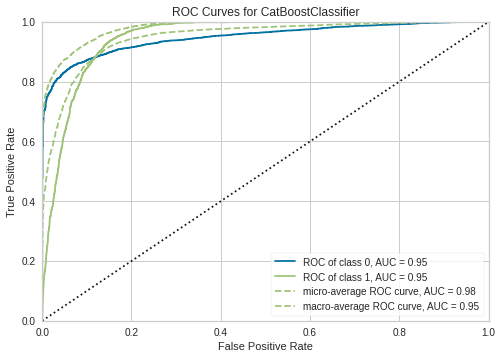

In [89]:
plot_model(ctb)

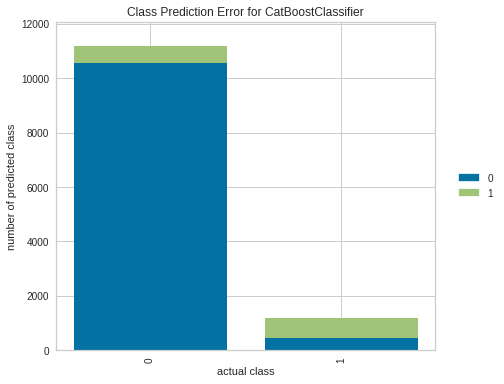

In [90]:
plot_model(ctb, plot = 'error')

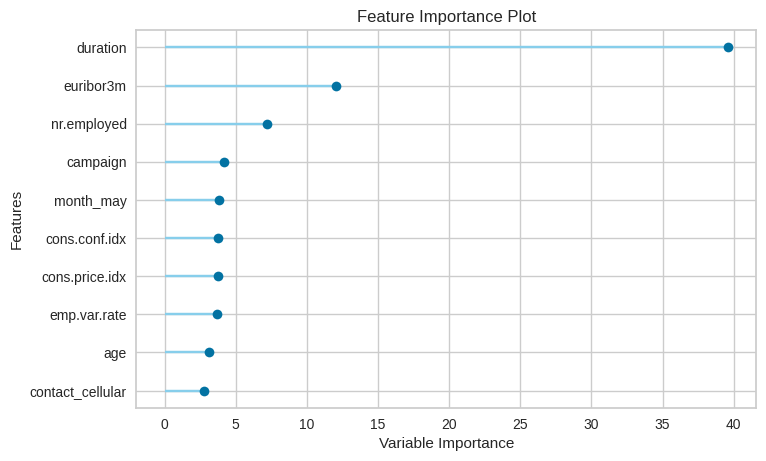

In [91]:
plot_model(ctb, plot='feature')

In [92]:
evaluate_model(ctb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [93]:
predict_model(ctb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9144,0.9478,0.5451,0.6337,0.5861,0.5386,0.5405


In [94]:
final_ctb = finalize_model(ctb)
final_ctb

In [95]:
predict_model(final_ctb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9501,0.9741,0.6936,0.8294,0.7554,0.7279,0.7315


In [96]:
#Predict the model using the data_unseen
unseen_predictions = predict_model(final_ctb, data=data_unseen)
unseen_predictions.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9994
1,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9997
2,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9997
3,39,housemaid,married,basic.4y,no,no,yes,telephone,may,mon,266,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9989
4,55,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,269,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9985


In [97]:
#Checking model´s accuracy
from pycaret.utils import check_metric
check_metric(unseen_predictions.y, unseen_predictions.Label, 'Accuracy')

0.95